In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# the following dataset emulates the joint information from a companies HR file and medical exam
# our goal is to try to approximate salaries from this information
# we have chosen to use a KNN regression
salary = pd.read_csv('salaries.csv')
salary.head()

,Salary,Experience,Gender,Height,Weight,Flexibility,Strenght,BMI,BirthC,Daltonic,Estrogen
0,32064.17357,Senior,Female,160.189080,60.110733,230.467496,227.262099,16.748028,1,None,74.619024
1,17160.86833,Junior,Female,153.100363,61.932449,260.080909,244.758004,17.101780,1,None,74.581776
2,30940.22480,Senior,Female,166.949128,58.109921,237.047355,236.998125,17.085108,1,None,85.510909
3,21036.86527,Junior,Male,173.952647,75.975594,151.578682,287.952815,21.061525,0,Dychromassy,22.091243
4,18855.00061,Junior,Male,180.282763,75.418624,152.502660,283.185533,21.134343,0,Dychromassy,21.749843


In [ ]:
salary.shape

(200, 11)

# Formal transformations

In [ ]:
salary['Daltonic'].value_counts()

None             99
Dychromassy      53
Monochromassy    48
Name: Daltonic, dtype: int64

In [ ]:
# one hot encoding
# you can also use sklearn.preprocessing.OneHotEncoder
#since we only accept numeric values, we have to turn the categorical variables into numerics
pd.get_dummies(salary['Daltonic'],prefix='Dalt',drop_first=True).head()

,Dalt_Monochromassy,Dalt_None
0,0,1
1,0,1
2,0,1
3,0,0
4,0,0


In [ ]:
salary_transformed = pd.merge(left = salary,
                              right = pd.get_dummies(salary['Daltonic'],prefix='Daltonic',drop_first=True),
                              left_index=True,
                              right_index=True)
salary_transformed

,Salary,Experience,Gender,Height,Weight,Flexibility,Strenght,BMI,BirthC,Daltonic,Estrogen,Daltonic_Monochromassy,Daltonic_None
0,32064.17357,Senior,Female,160.189080,60.110733,230.467496,227.262099,16.748028,1,None,74.619024,0,1
1,17160.86833,Junior,Female,153.100363,61.932449,260.080909,244.758004,17.101780,1,None,74.581776,0,1
2,30940.22480,Senior,Female,166.949128,58.109921,237.047355,236.998125,17.085108,1,None,85.510909,0,1
3,21036.86527,Junior,Male,173.952647,75.975594,151.578682,287.952815,21.061525,0,Dychromassy,22.091243,0,0
4,18855.00061,Junior,Male,180.282763,75.418624,152.502660,283.185533,21.134343,0,Dychromassy,21.749843,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,29555.74937,Senior,Male,168.149552,73.913408,158.365212,282.779401,21.102963,0,Dychromassy,32.487848,0,0
196,28538.14361,Senior,Male,181.221799,74.308332,164.034265,293.964437,21.431592,0,Monochromassy,34.760106,1,0
197,20806.61816,Junior,Female,155.145032,60.678250,256.835440,237.695512,17.206375,1,None,89.997758,0,1
198,32243.18934,Senior,Female,159.881301,56.090393,241.014490,241.293486,17.464618,1,None,76.037265,0,1


In [ ]:
# Binning: To turn numeric features into categorical ones. In this case we're not going to use categorical features, but for the record:
pd.cut(salary['Height'],5,labels=['very short','short','average','tall','very tall'])

0           short
1      very short
2         average
3            tall
4       very tall
          ...    
195       average
196     very tall
197    very short
198         short
199          tall
Name: Height, Length: 200, dtype: category
Categories (5, object): ['very short' < 'short' < 'average' < 'tall' < 'very tall']

In [ ]:
salary_transformed['Height_classes'] = pd.cut(salary['Height'],5,labels=['very short','short','average','tall','very tall'])
salary_transformed.head()

,Salary,Experience,Gender,Height,Weight,Flexibility,Strenght,BMI,BirthC,Daltonic,Estrogen,Daltonic_Monochromassy,Daltonic_None,Height_classes
0,32064.17357,Senior,Female,160.189080,60.110733,230.467496,227.262099,16.748028,1,None,74.619024,0,1,short
1,17160.86833,Junior,Female,153.100363,61.932449,260.080909,244.758004,17.101780,1,None,74.581776,0,1,very short
2,30940.22480,Senior,Female,166.949128,58.109921,237.047355,236.998125,17.085108,1,None,85.510909,0,1,average
3,21036.86527,Junior,Male,173.952647,75.975594,151.578682,287.952815,21.061525,0,Dychromassy,22.091243,0,0,tall
4,18855.00061,Junior,Male,180.282763,75.418624,152.502660,283.185533,21.134343,0,Dychromassy,21.749843,0,0,very tall


In [ ]:
# label encoding - for when the categories need to be numbers but the values of those numbers do not matter
# you can also use sklearn.preprocessing.LabelEncoder
salary_transformed['Experience_label'] = salary_transformed['Experience'].replace({'Junior':0,'Senior':1})
salary_transformed['Gender_label'] = salary_transformed['Gender'].replace({'Male':0,'Female':1})
salary_transformed.head()

,Salary,Experience,Gender,Height,Weight,Flexibility,Strenght,BMI,BirthC,Daltonic,Estrogen,Daltonic_Monochromassy,Daltonic_None,Height_classes,Experience_label,Gender_label
0,32064.17357,Senior,Female,160.189080,60.110733,230.467496,227.262099,16.748028,1,None,74.619024,0,1,short,1,1
1,17160.86833,Junior,Female,153.100363,61.932449,260.080909,244.758004,17.101780,1,None,74.581776,0,1,very short,0,1
2,30940.22480,Senior,Female,166.949128,58.109921,237.047355,236.998125,17.085108,1,None,85.510909,0,1,average,1,1
3,21036.86527,Junior,Male,173.952647,75.975594,151.578682,287.952815,21.061525,0,Dychromassy,22.091243,0,0,tall,0,0
4,18855.00061,Junior,Male,180.282763,75.418624,152.502660,283.185533,21.134343,0,Dychromassy,21.749843,0,0,very tall,0,0


In [ ]:
# we can now drop the non-numerics and keep only numeric columns
salary_transformed = salary_transformed.drop(columns=['Experience','Gender','Daltonic','Height_classes'])
salary_transformed.head()

,Salary,Height,Weight,Flexibility,Strenght,BMI,BirthC,Estrogen,Daltonic_Monochromassy,Daltonic_None,Experience_label,Gender_label
0,32064.17357,160.189080,60.110733,230.467496,227.262099,16.748028,1,74.619024,0,1,1,1
1,17160.86833,153.100363,61.932449,260.080909,244.758004,17.101780,1,74.581776,0,1,0,1
2,30940.22480,166.949128,58.109921,237.047355,236.998125,17.085108,1,85.510909,0,1,1,1
3,21036.86527,173.952647,75.975594,151.578682,287.952815,21.061525,0,22.091243,0,0,0,0
4,18855.00061,180.282763,75.418624,152.502660,283.185533,21.134343,0,21.749843,0,0,0,0


In [ ]:
# now we will create the usual train-test splits

from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(salary_transformed.drop(columns = ['Salary']),salary_transformed['Salary'])

print(X_train.shape)
print(X_test.shape)
X_train.head()

(150, 11)
(50, 11)


,Height,Weight,Flexibility,Strenght,BMI,BirthC,Estrogen,Daltonic_Monochromassy,Daltonic_None,Experience_label,Gender_label
193,159.173237,59.680599,242.605651,217.714605,17.127464,1,82.196918,0,1,1,1
126,171.259976,78.850788,155.987223,270.656088,20.992895,0,26.737261,1,0,0,0
148,162.486354,61.813886,240.090101,237.807353,17.228126,1,81.976555,0,1,0,1
183,172.430526,75.007343,155.430179,265.673852,20.898089,0,28.365903,0,0,0,0
125,167.653618,77.025320,147.471238,268.800038,20.842314,0,28.426125,0,0,0,0


In [ ]:
X_test.head()

,Height,Weight,Flexibility,Strenght,BMI,BirthC,Estrogen,Daltonic_Monochromassy,Daltonic_None,Experience_label,Gender_label
62,175.706131,77.107323,138.767255,285.249180,20.677214,0,22.641077,1,0,0,0
101,162.144477,58.976485,224.932179,253.258383,17.063074,1,76.677351,0,1,0,1
150,171.805045,73.653604,153.596973,283.494195,20.901731,0,30.088658,0,0,0,0
46,180.514122,72.933673,146.419479,297.208972,21.005380,0,32.784078,1,0,1,0
141,162.367553,60.115726,248.921371,229.491508,17.255964,1,78.451288,0,1,0,1


In [ ]:
# let's jump right to a model
# notice the KNN regressor version
from sklearn.neighbors import KNeighborsRegressor
# measuring MSE score <- mean square error (real salary - predicted salary)**2


# create knn, don't forget Hyperparameter
knn = KNeighborsRegressor(n_neighbors=3)

In [ ]:
# training the model on raw data
knn.fit(X_train, y_train)
# testing algorithm on raw test
pred = knn.predict(X_test)
pred

array([27092.70454   , 27128.37218333, 27033.30851667, 22896.95001   ,
       21833.75388   , 32679.49711667, 24588.25434667, 23788.42012667,
       30284.22461667, 29121.83202667, 23380.8432    , 26662.22516333,
       28491.38219333, 25446.65651667, 28158.65611333, 23196.62897333,
       21677.93221333, 23809.52447   , 29472.05557   , 18955.28554333,
       23788.42012667, 26445.77202   , 22052.613     , 28432.35351333,
       27454.89742667, 30421.27148   , 27378.63980333, 26887.37512   ,
       25221.37951333, 20123.39406   , 26995.75674333, 23870.89021667,
       22550.05282   , 28474.27526333, 21495.26907   , 20731.11608   ,
       27986.31398   , 28625.48093   , 20328.34966667, 28474.27526333,
       25742.26471333, 29964.68807667, 21108.13439667, 25077.29735667,
       20850.10925   , 29540.50620333, 30941.30447333, 29158.69951667,
       23196.62897333, 21183.17468333])

In [ ]:
np.array(y_test)

array([18517.92862, 20653.09379, 14593.73237, 33109.00086, 20528.24474,
       16542.27857, 22680.9478 , 33569.43142, 29188.41968, 18716.19988,
       20003.13725, 31231.27885, 20898.45745, 28541.31073, 29940.82986,
       19694.85027, 28594.20772, 35167.54502, 21718.29872, 23404.25346,
       21036.86527, 34017.02702, 21241.24631, 21861.16491, 29505.50875,
       30437.04885, 30290.39204, 20189.43041, 28999.9137 , 35275.32185,
       29895.37178, 18708.36302, 16152.03022, 20218.31183, 17875.58933,
       27859.75991, 19480.3042 , 33595.51033, 30201.66088, 29860.40234,
       25360.87935, 20626.32729, 25012.80255, 25851.75653, 21651.91216,
       23427.78396, 33580.6887 , 35011.12381, 19075.60403, 28403.76857])

In [ ]:
np.sqrt(mean_squared_error(y_test,pred))

6757.6647462149085

# Normalization

In [ ]:
#let's apply a normalization of the features since "flexibility" seems to count 200 times more than Daltonic_None
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

# create normalization object from scikit learn package, and "fit" it to the features in hand
normalizer = MinMaxScaler()
# notice how we only use the **X_train** data to fit?
# we want to use only the training data to normalize (establishing maximum and minimum values) to avoid data "leakage" from the test dataset
# if we used data from the test dataset, the test results would be biased by having some info from the test set
normalizer = normalizer.fit(X_train)

In [ ]:
# now that we have our normalizer we use it for both training and testing (and in the future for unseen data as well!)
X_train_normalized = normalizer.transform(X_train)
X_train_normalized = pd.DataFrame(X_train_normalized,columns=X_train.columns)
X_train_normalized.head()

,Height,Weight,Flexibility,Strenght,BMI,BirthC,Estrogen,Daltonic_Monochromassy,Daltonic_None,Experience_label,Gender_label
0,0.294504,0.189122,0.842603,0.000000,0.143241,1.0,0.873055,0.0,1.0,1.0,1.0
1,0.592890,0.961111,0.190017,0.574917,0.843276,0.0,0.104813,1.0,0.0,0.0,0.0
2,0.376295,0.275030,0.823651,0.218197,0.161471,1.0,0.870003,0.0,1.0,0.0,1.0
3,0.621787,0.806335,0.185820,0.520812,0.826106,0.0,0.127373,0.0,0.0,0.0,0.0
4,0.503859,0.887599,0.125857,0.554761,0.816005,0.0,0.128207,0.0,0.0,0.0,0.0


In [ ]:
X_test_normalized = normalizer.transform(X_test)
X_test_normalized = pd.DataFrame(X_test_normalized,columns=X_test.columns)
X_test_normalized.head()

,Height,Weight,Flexibility,Strenght,BMI,BirthC,Estrogen,Daltonic_Monochromassy,Daltonic_None,Experience_label,Gender_label
0,0.702652,0.890902,0.060281,0.733390,0.786105,0.0,0.048071,1.0,0.0,0.0,0.0
1,0.367855,0.160767,0.709450,0.385987,0.131580,1.0,0.796597,0.0,1.0,0.0,1.0
2,0.606346,0.751819,0.172008,0.714332,0.826766,0.0,0.151237,0.0,0.0,0.0,0.0
3,0.821348,0.722827,0.117933,0.863267,0.845537,0.0,0.188575,1.0,0.0,1.0,0.0
4,0.373362,0.206644,0.890186,0.127891,0.166513,1.0,0.821170,0.0,1.0,0.0,1.0


In [ ]:
# let's see if this normalization improves our model
# creating model
knn = KNeighborsRegressor(n_neighbors=3)
# training the model on normalized data
knn.fit(X_train_normalized, y_train)
# testing algorithm on normalized test
pred = knn.predict(X_test_normalized)

np.sqrt(mean_squared_error(y_test,pred))
#much better!

3317.492139915385

# Correlation Tresholds

In [ ]:
# let's see if our variables are too dependent
pyplot as plt

,Height,Weight,Flexibility,Strenght,BMI,BirthC,Estrogen,Daltonic_Monochromassy,Daltonic_None,Experience_label,Gender_label
Height,1.000000,0.787896,-0.812494,0.751761,0.818793,-0.789843,-0.800485,0.461996,-0.826871,0.055882,-0.826871
Weight,0.787896,1.000000,-0.950947,0.869410,0.957143,-0.926059,-0.940921,0.576223,-0.965878,0.062736,-0.965878
Flexibility,-0.812494,-0.950947,1.000000,-0.888156,-0.974612,0.939150,0.966844,-0.584780,0.981187,-0.092310,0.981187
Strenght,0.751761,0.869410,-0.888156,1.000000,0.886999,-0.849546,-0.869396,0.522833,-0.897694,0.002398,-0.897694
BMI,0.818793,0.957143,-0.974612,0.886999,1.000000,-0.947046,-0.969395,0.581290,-0.989706,0.097278,-0.989706
BirthC,-0.789843,-0.926059,0.939150,-0.849546,-0.947046,1.000000,0.937064,-0.569495,0.960769,-0.079025,0.960769
Estrogen,-0.800485,-0.940921,0.966844,-0.869396,-0.969395,0.937064,1.000000,-0.572578,0.980281,-0.097989,0.980281
Daltonic_Monochromassy,0.461996,0.576223,-0.584780,0.522833,0.581290,-0.569495,-0.572578,1.000000,-0.592749,0.060208,-0.592749
Daltonic_None,-0.826871,-0.965878,0.981187,-0.897694,-0.989706,0.960769,0.980281,-0.592749,1.000000,-0.093367,1.000000
Experience_label,0.055882,0.062736,-0.092310,0.002398,0.097278,-0.079025,-0.097989,0.060208,-0.093367,1.000000,-0.093367


<ipython-input-22-e9a2d99b97d6>:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


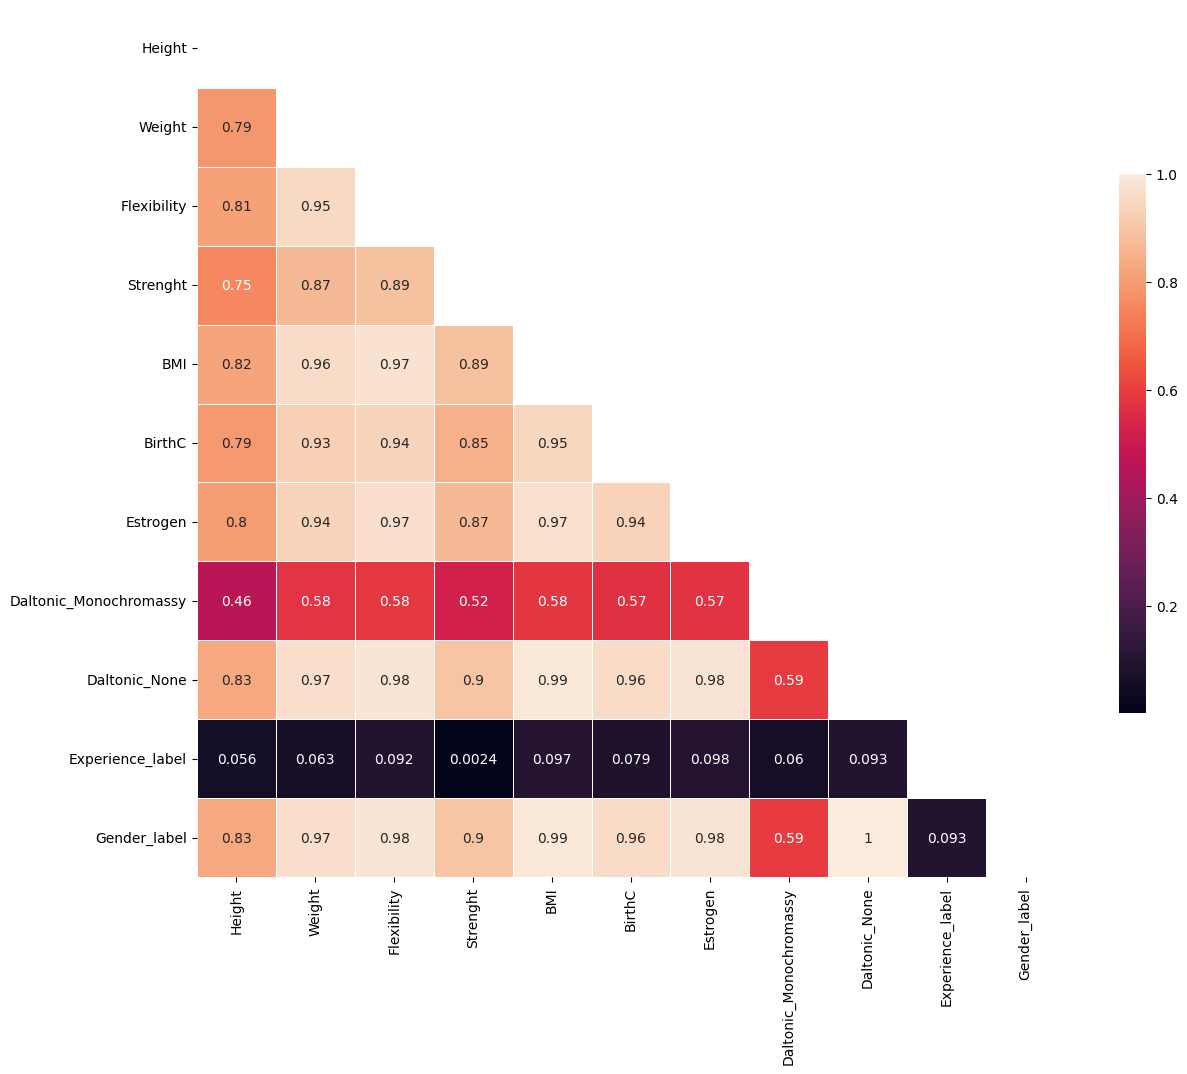

In [ ]:
#A very common way to visualize the results discussed above is to create a correlation matrix.
# This is shown below.
# Only the lower triangular component of the matrix is shown due to the fact that
# the upper and lower (triangular) parts of the matrix are equal
import matplotlib.pyplot as plt
import seaborn as sn

corr=np.abs(X_train_normalized.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [ ]:
X_train_normalized.head()

,Height,Weight,Flexibility,Strenght,BMI,BirthC,Estrogen,Daltonic_Monochromassy,Daltonic_None,Experience_label,Gender_label
0,0.294504,0.189122,0.842603,0.000000,0.143241,1.0,0.873055,0.0,1.0,1.0,1.0
1,0.592890,0.961111,0.190017,0.574917,0.843276,0.0,0.104813,1.0,0.0,0.0,0.0
2,0.376295,0.275030,0.823651,0.218197,0.161471,1.0,0.870003,0.0,1.0,0.0,1.0
3,0.621787,0.806335,0.185820,0.520812,0.826106,0.0,0.127373,0.0,0.0,0.0,0.0
4,0.503859,0.887599,0.125857,0.554761,0.816005,0.0,0.128207,0.0,0.0,0.0,0.0


In [ ]:
# very clear that all variables are essentially the same! Except for experience!
# what is the effect of this?

#let's get rid of such variables
X_train_reduced = X_train_normalized[['Gender_label','Experience_label']]
X_test_reduced = X_test_normalized[['Gender_label','Experience_label']]

In [ ]:
# creating our knn model
knn = KNeighborsRegressor(n_neighbors=3)
# training the model on reduced, normalized data
knn.fit(X_train_reduced, y_train)
# testing algorithm on reduced, normalized test
pred = knn.predict(X_test_reduced)

np.sqrt(mean_squared_error(y_test,pred))

3339.508362249202

# Feature manipulation for signal boosting

In [ ]:
# we want to understand what drives loss of energy in our windfarms
energy = pd.read_csv('energy_loss.csv')
energy.head()

,Loss,Voltage,Rotation,Stability
0,112.226170,105.691563,159.023456,89.002299
1,45.570772,102.941745,155.265519,92.429811
2,70.105341,104.989796,149.004972,95.212876
3,238.675027,97.525861,163.093562,98.138643
4,128.093533,110.614898,151.604033,93.717455


In [ ]:
# let's try to predict it "raw"
X = energy[['Voltage','Rotation','Stability']]
y = energy['Loss']

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X, y)
reg.score(X, y)

0.006501958809303154

In [ ]:
# however we know the optimal values of Voltage, Rotation and Stability from an engineer
energy_transformed = energy.copy()
energy_transformed['Voltage'] = np.square(energy_transformed['Voltage']-100)
energy_transformed['Rotation'] = np.square(energy_transformed['Rotation']-150)
energy_transformed['Stability'] = np.square(energy_transformed['Stability']-90)
X = energy_transformed[['Voltage','Rotation','Stability']]
y = energy_transformed['Loss']

In [ ]:
X

,Voltage,Rotation,Stability
0,32.393893,81.422749,0.995408
1,8.653864,27.725688,5.903980
2,24.898062,0.990081,27.174076
3,6.121364,171.441361,66.237512
4,112.676057,2.572923,13.819471
...,...,...,...
1995,152.536418,54.155420,4.860301
1996,31.849126,62.170431,14.066710
1997,69.889110,105.330374,44.976774
1998,134.995464,159.528113,61.857668


In [ ]:
# the model improves dramatically
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X, y)
reg.score(X, y)

0.9982401351758541